Import necessary packages

In [84]:
import pandas as pd
import psycopg2
from psycopg2 import Error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Establish connections to the database

In [85]:
try:
    # Connect to an existing database
    connection = psycopg2.connect(database="2022-everything-team12", 
                            user='ycj6475', 
                            password='White001!', 
                            host='pg.analytics.northwestern.edu', 
                            port= '5432')

    # Create a cursor to perform database operations
    cursor = connection.cursor()
    # Print PostgreSQL details
    cursor.execute("SELECT version();")
    # Fetch result
    record = cursor.fetchone()
    print("You are connected to - ", record, "\n")
except (Exception, Error) as error:
    print("Error while connecting to PostgreSQL", error)
df = pd.read_sql("select * from \"agg_data2\"", connection);
if (connection):
    cursor.close()
    connection.close()
    print("PostgreSQL connection is closed") 


You are connected to -  ('PostgreSQL 10.12 on x86_64-pc-linux-gnu, compiled by gcc (GCC) 4.8.5 20150623 (Red Hat 4.8.5-39), 64-bit',) 



/opt/homebrew/lib/python3.10/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


PostgreSQL connection is closed


In [86]:
# check the data
df.head()

,saledate,state,nsku,nreturns,npurchase,totalquantity,avgquantity,minquantity,maxquantity,totalincometrnsact,...,maxdiscount2,totalrevenue,avgrevenue,minrevenue,maxrevenue,nstore,ncities,ndept,nvendors,avgvendorsstore
0,2004-08-01,AL,4372,462,4832,5294,67,1,1,124558.44,...,393.75,16370.510000,209.878333,-19.07,290.0,12,10,56,421,35
1,2004-08-01,AR,3151,529,3692,4221,52,1,1,108706.34,...,175.00,15505.529964,193.819125,-30.26,275.0,7,7,57,400,57
2,2004-08-01,AZ,7274,799,9272,10071,89,1,1,248286.13,...,135.00,37742.759947,336.988928,-40.26,152.5,14,10,58,464,33
3,2004-08-01,CA,1145,128,1174,1302,14,1,1,34670.94,...,59.25,4271.700006,45.932258,-4.17,225.0,2,2,53,259,129
4,2004-08-01,CO,4354,402,5295,5697,61,1,1,133883.66,...,297.50,19883.339986,213.799355,-84.75,320.0,11,9,58,391,35


In [87]:
# check null value counts
df.notnull().sum()


saledate              11281
state                 11281
nsku                  11281
nreturns              11281
npurchase             11281
totalquantity         11281
avgquantity           11281
minquantity           11281
maxquantity           11281
totalincometrnsact    11281
avgincometrnsact      11281
minamt                11281
maxamt                11281
avgorigprice          11281
minorigprice          11281
maxorigprice          11281
avgretail             11281
minretail             11281
maxretail             11281
totalcosttrnsact      11281
avgcosttrnsact        11281
mincost               11281
maxcost               11281
totaldiscount         11281
avgdiscount           11281
mindiscount           11281
maxdiscount           11281
totaldiscount2        11281
avgdiscount2          11281
mindiscount2          11281
maxdiscount2          11281
totalrevenue          11281
avgrevenue            11281
minrevenue            11281
maxrevenue            11281
nstore              

check the shape of total revenue column, no trend oe seasonality found

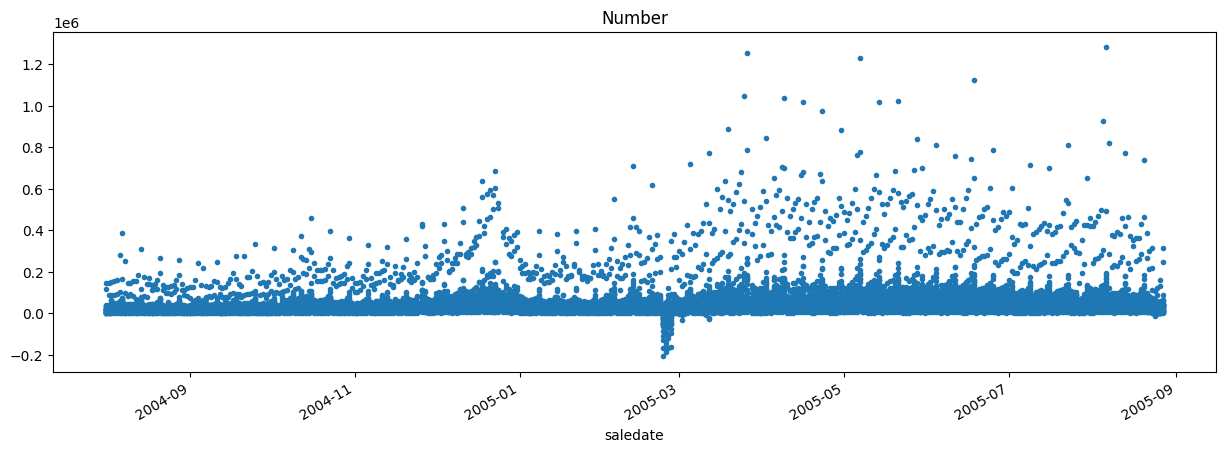

In [88]:
df_groupyed = df
color_pal = sns.color_palette()
# set df index as date
df_ts = df_groupyed.set_index('saledate')
df_ts.index = pd.to_datetime(df_ts.index)
# check distribution of revenue (no pattern found)
df_ts_draw = df_ts["totalrevenue"]
df_ts_draw.plot(style='.',
        figsize=(15, 5),
        color=color_pal[0],
        title='Number')
plt.show()


In [89]:
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofmonth'] = df.index.day
    return df
# create time series features
df_ts = create_features(df_ts)
df_ts

,state,nsku,nreturns,npurchase,totalquantity,avgquantity,minquantity,maxquantity,totalincometrnsact,avgincometrnsact,...,ncities,ndept,nvendors,avgvendorsstore,hour,dayofweek,quarter,month,year,dayofmonth
saledate,,,,,,,,,,,,,,,,,,,,,
2004-08-01,AL,4372,462,4832,5294,67,1,1,124558.44,1596.903077,...,10,56,421,35,0,6,3,8,2004,1
2004-08-01,AR,3151,529,3692,4221,52,1,1,108706.34,1358.829250,...,7,57,400,57,0,6,3,8,2004,1
2004-08-01,AZ,7274,799,9272,10071,89,1,1,248286.13,2216.840446,...,10,58,464,33,0,6,3,8,2004,1
2004-08-01,CA,1145,128,1174,1302,14,1,1,34670.94,372.805806,...,2,53,259,129,0,6,3,8,2004,1
2004-08-01,CO,4354,402,5295,5697,61,1,1,133883.66,1439.609247,...,9,58,391,35,0,6,3,8,2004,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-08-27,TN,20112,1686,28464,30150,126,1,1,628673.44,2641.485042,...,10,60,588,42,0,5,3,8,2005,27
2005-08-27,TX,64812,10278,156933,167211,471,1,1,3467537.94,9767.712507,...,46,60,815,14,0,5,3,8,2005,27
2005-08-27,UT,9443,769,12166,12935,81,1,1,240634.81,1513.426478,...,6,57,480,80,0,5,3,8,2005,27


In [90]:
orignal_features = list(df.columns)
orignal_features.remove('saledate')
orignal_features

['state',
 'nsku',
 'nreturns',
 'npurchase',
 'totalquantity',
 'avgquantity',
 'minquantity',
 'maxquantity',
 'totalincometrnsact',
 'avgincometrnsact',
 'minamt',
 'maxamt',
 'avgorigprice',
 'minorigprice',
 'maxorigprice',
 'avgretail',
 'minretail',
 'maxretail',
 'totalcosttrnsact',
 'avgcosttrnsact',
 'mincost',
 'maxcost',
 'totaldiscount',
 'avgdiscount',
 'mindiscount',
 'maxdiscount',
 'totaldiscount2',
 'avgdiscount2',
 'mindiscount2',
 'maxdiscount2',
 'totalrevenue',
 'avgrevenue',
 'minrevenue',
 'maxrevenue',
 'nstore',
 'ncities',
 'ndept',
 'nvendors',
 'avgvendorsstore']

In [91]:
df_model = pd.DataFrame(columns = df_ts.columns)
# TODO: add lags
def create_lag_feature(df, column):
    '''
    Create time lagging features
    '''
    df = df.copy()
    df[column + '_1'] = df[column].shift(1)
    df[column + '_2'] = df[column].shift(2)
    df[column + '_3'] = df[column].shift(3)
    df[column + '_4'] = df[column].shift(4)
    df[column + '_5'] = df[column].shift(5)
    df[column + '_6'] = df[column].shift(6)
    df[column + '_7'] = df[column].shift(7)
    df[column + '_14'] = df[column].shift(14)
    df[column + '_28'] = df[column].shift(28)
    return df


orignal_features = list(df.columns)
orignal_features.remove('saledate')
orignal_features.remove('state')

for col in orignal_features:
    df_ts = create_lag_feature(df_ts, col)

orignal_features.remove('totalrevenue')
df_ts_lagged = df_ts.drop(orignal_features, axis=1)
df_ts_lagged


,state,totalrevenue,hour,dayofweek,quarter,month,year,dayofmonth,nsku_1,nsku_2,...,nvendors_28,avgvendorsstore_1,avgvendorsstore_2,avgvendorsstore_3,avgvendorsstore_4,avgvendorsstore_5,avgvendorsstore_6,avgvendorsstore_7,avgvendorsstore_14,avgvendorsstore_28
saledate,,,,,,,,,,,,,,,,,,,,,
2004-08-01,AL,16370.510000,0,6,3,8,2004,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-01,AR,15505.529964,0,6,3,8,2004,1,4372.0,NaN,...,NaN,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-01,AZ,37742.759947,0,6,3,8,2004,1,3151.0,4372.0,...,NaN,57.0,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-01,CA,4271.700006,0,6,3,8,2004,1,7274.0,3151.0,...,NaN,33.0,57.0,35.0,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-01,CO,19883.339986,0,6,3,8,2004,1,1145.0,7274.0,...,NaN,129.0,33.0,57.0,35.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-08-27,TN,63150.580142,0,5,3,8,2005,27,11204.0,17831.0,...,782.0,63.0,47.0,34.0,126.0,86.0,111.0,36.0,192.0,13.0
2005-08-27,TX,312217.519592,0,5,3,8,2005,27,20112.0,11204.0,...,425.0,42.0,63.0,47.0,34.0,126.0,86.0,111.0,72.0,70.0
2005-08-27,UT,34240.470022,0,5,3,8,2005,27,64812.0,20112.0,...,488.0,14.0,42.0,63.0,47.0,34.0,126.0,86.0,65.0,48.0


In [92]:
# one hot encoding for state variable
df_ts_lagged = pd.get_dummies(df_ts_lagged)
df_ts_lagged.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11281 entries, 2004-08-01 to 2005-08-27
Columns: 378 entries, totalrevenue to state_WY
dtypes: float64(343), int64(6), uint8(29)
memory usage: 30.4 MB


Modeling:

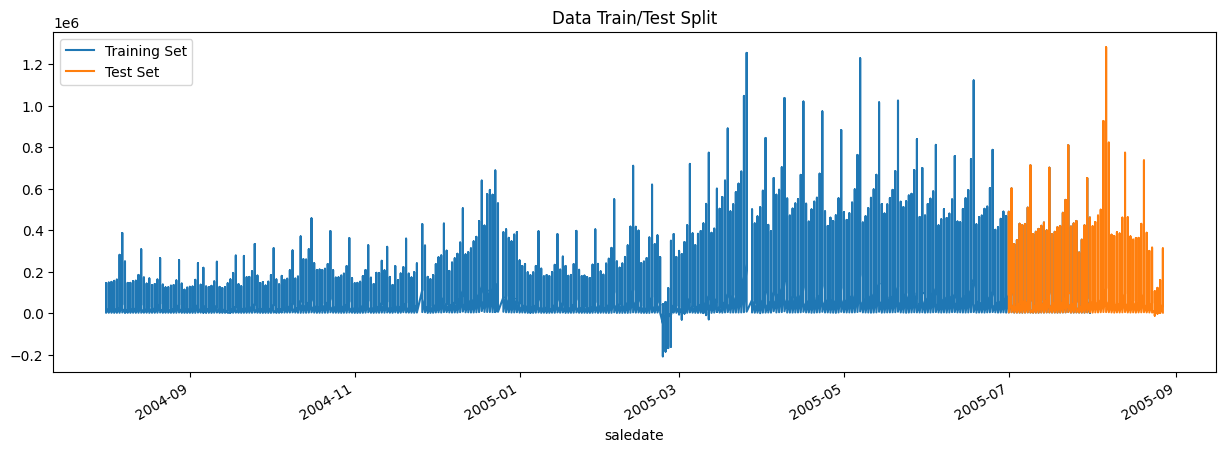

In [93]:
df_ts = df_ts_lagged

# train_test split
train = df_ts.loc[df_ts.index < '08-01-2005']
test = df_ts.loc[df_ts.index >= '07-01-2005']
# plot the train test dataset
train_ts_draw = train["totalrevenue"]
test_ts_draw = test["totalrevenue"]
fig, ax = plt.subplots(figsize=(15, 5))
train_ts_draw.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test_ts_draw.plot(ax=ax, label='Test Set')
ax.legend(['Training Set', 'Test Set'])
plt.show()

In [94]:
# split the data with labels
X_train = train.drop('totalrevenue', axis = 1)
y_train = train['totalrevenue']
X_test = test.drop('totalrevenue', axis = 1)
y_test = test['totalrevenue']

In [95]:
# standardlize data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
standardX_train = sc.transform(X_train)
standardX_test = sc.transform(X_test)
X_Train_standardlized = pd.DataFrame(standardX_train, columns = list(X_train.columns))
X_Test_standardlized = pd.DataFrame(standardX_test, columns = list(X_test.columns))


In [96]:
# minmaxScale the data
from sklearn.preprocessing import MinMaxScaler
mc = MinMaxScaler()
mc.fit(X_train)
minMaxX_train = mc.transform(X_train)
minMaxX_test = mc.transform(X_test)
X_Train_minmax = pd.DataFrame(minMaxX_train, columns = list(X_train.columns))
X_Test_minmax = pd.DataFrame(minMaxX_test, columns = list(X_test.columns))


In [97]:
X_Test_minmax.head()

,hour,dayofweek,quarter,month,year,dayofmonth,nsku_1,nsku_2,nsku_3,nsku_4,...,state_NM,state_NV,state_OH,state_OK,state_SC,state_TN,state_TX,state_UT,state_VA,state_WY
0,0.0,0.666667,0.666667,0.545455,1.0,0.0,0.004878,0.065722,0.047143,0.470025,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.666667,0.666667,0.545455,1.0,0.0,0.133246,0.004878,0.065722,0.047143,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.666667,0.666667,0.545455,1.0,0.0,0.098542,0.133246,0.004878,0.065722,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.666667,0.666667,0.545455,1.0,0.0,0.175931,0.098542,0.133246,0.004878,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.666667,0.666667,0.545455,1.0,0.0,0.042021,0.175931,0.098542,0.133246,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [98]:
# tune the XGBoost model
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
params = { #'max_depth': [3,6,10],
           'learning_rate': [0.01, 0.05, 0.1],
           #'n_estimators': [100, 500, 1000],
           #'colsample_bytree': [0.3, 0.7]
           }
xgbr = xgb.XGBRegressor(seed = 400)
clf = GridSearchCV(estimator=xgbr, 
                   param_grid=params,
                   scoring='neg_mean_squared_error', 
                   verbose=1)
clf.fit(X_train, y_train,verbose=100)


Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None, ...),
             param_grid={'learning_rate': [0.01, 0.05, 0.1]},
             scoring='neg_mean_squared_error', verbose=1)

In [99]:
# use the tuned results to fit the xgboost regressor model
import xgboost as xgb
reg_tuned = clf.best_estimator_
reg_tuned.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

[0]	validation_0-rmse:99442.00123	validation_1-rmse:109229.88131
[99]	validation_0-rmse:5912.30666	validation_1-rmse:20868.84962


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=400,
             reg_alpha=0, reg_lambda=1, ...)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

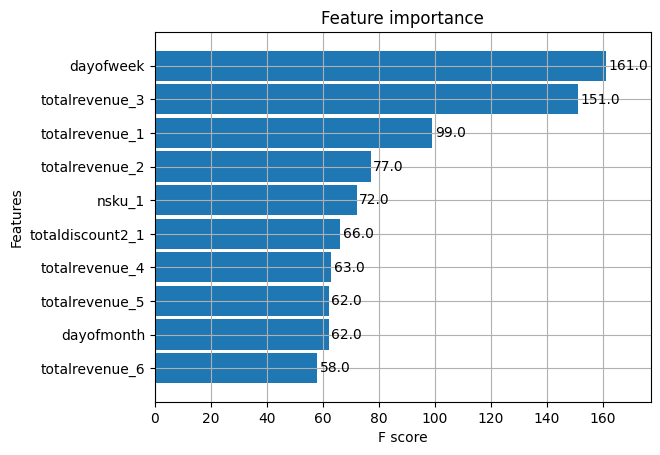

In [100]:
from xgboost import plot_importance, plot_tree
# get the variable importance of XGboost model
# plot_importance(reg,max_num_features=10,height=0.9)
plot_importance(reg_tuned,max_num_features=10,height=0.9)



In [101]:
# do the prediction
y_pred = reg_tuned.predict(X_test)
X_test['prediction'] = y_pred
test_pred = pd.concat([X_test, X_train], sort=False)

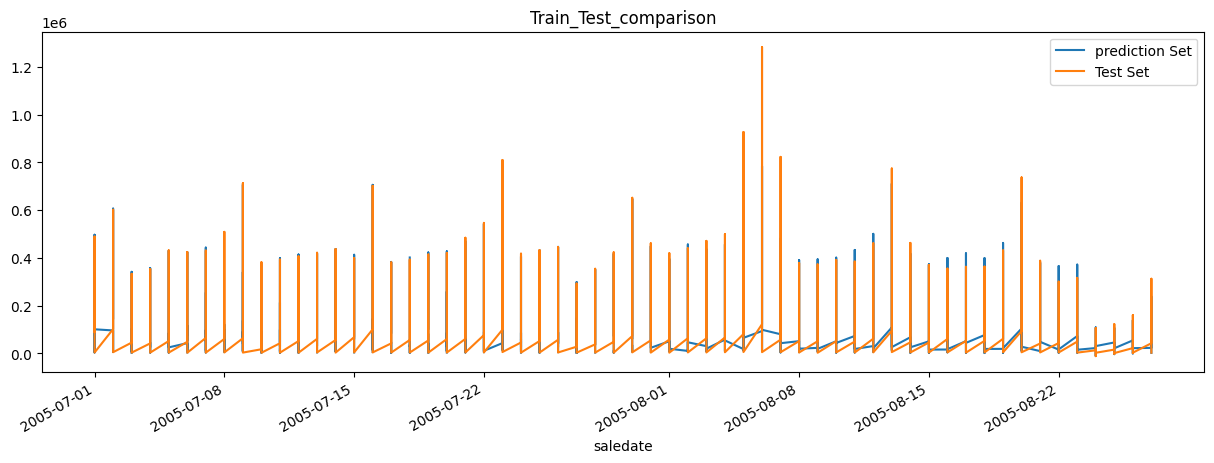

In [102]:
# graph the distribution of prediction vs actual
test_ts_draw = test["totalrevenue"]
test_prediction = test_pred["prediction"]
fig, ax = plt.subplots(figsize=(15, 5))
test_prediction.plot(ax=ax, label='prediction Set', title='Train_Test_comparison')
test_ts_draw.plot(ax=ax, label='Test Set')
ax.legend(['prediction Set', 'Test Set'])
plt.show()

In [103]:
import sklearn.metrics as metrics
def show_results(y_true, y_pred):
    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    r2=metrics.r2_score(y_true, y_pred)
    print('explained_variance: ', round(explained_variance,4))    
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [104]:
show_results(y_test, y_pred)

explained_variance:  0.9556
r2:  0.9555
MAE:  7623.8937
MSE:  435508890.318
RMSE:  20868.8498


### Standardlized Dataset

Fitting 2 folds for each of 1 candidates, totalling 2 fits
[0]	validation_0-rmse:99442.00123	validation_1-rmse:109229.88131
[99]	validation_0-rmse:5912.30666	validation_1-rmse:20870.43282


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

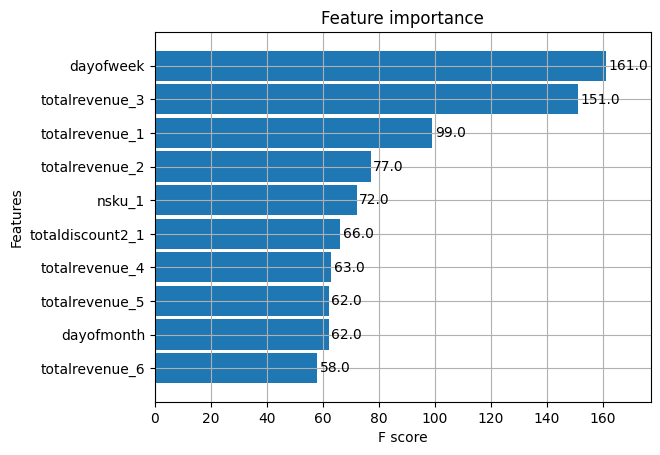

In [105]:
# training on the standardlized dataset

import xgboost as xgb
# tune the XGBoost model
from sklearn.model_selection import GridSearchCV
params = { #'max_depth': [3,6,10],
           'learning_rate': [0.1],
           #'n_estimators': [100, 500, 1000],
           #'colsample_bytree': [0.3, 0.7]
           }
xgbr = xgb.XGBRegressor(seed = 400)
clf = GridSearchCV(estimator=xgbr, 
                   param_grid=params,
                   scoring='neg_mean_squared_error', 
                   verbose=1,
                   cv = 2)
clf.fit(X_Train_standardlized, y_train,verbose=100)

import xgboost as xgb
reg_tuned = clf.best_estimator_
reg_tuned.fit(X_Train_standardlized, y_train,
        eval_set=[(X_Train_standardlized, y_train), (X_Test_standardlized, y_test)],
        verbose=100)

from xgboost import plot_importance, plot_tree
# get the variable importance of XGboost model
plot_importance(reg_tuned,max_num_features=10,height=0.9)


In [106]:
y_pred = reg_tuned.predict(X_Test_standardlized)
X_Test_standardlized['prediction'] = y_pred
show_results(y_test, y_pred)

explained_variance:  0.9556
r2:  0.9555
MAE:  7625.0267
MSE:  435574972.1116
RMSE:  20870.433


Fitting 2 folds for each of 3 candidates, totalling 6 fits
[0]	validation_0-rmse:99442.00123	validation_1-rmse:109229.88131
[99]	validation_0-rmse:5912.30666	validation_1-rmse:20865.05845


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

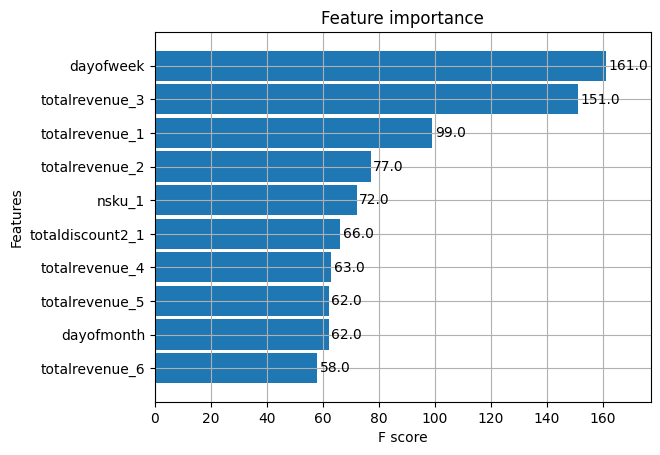

In [107]:
# training on the min-max scaled dataset
import xgboost as xgb
# tune the XGBoost model
from sklearn.model_selection import GridSearchCV
params = { #'max_depth': [3,6,10],
           'learning_rate': [0.01, 0.05, 0.1],
           #'n_estimators': [100, 500, 1000],
           #'colsample_bytree': [0.3, 0.7]
           }
xgbr = xgb.XGBRegressor(seed = 400)
clf = GridSearchCV(estimator=xgbr, 
                   param_grid=params,
                   scoring='neg_mean_squared_error', 
                   verbose=1,
                   cv = 2)
clf.fit(X_Train_minmax, y_train,verbose=100)

import xgboost as xgb
reg_tuned = clf.best_estimator_
reg_tuned.fit(X_Train_minmax, y_train,
        eval_set=[(X_Train_minmax, y_train), (X_Test_minmax, y_test)],
        verbose=100)

from xgboost import plot_importance, plot_tree
# get the variable importance of XGboost model
plot_importance(reg_tuned,max_num_features=10,height=0.9)


In [110]:
y_pred = reg_tuned.predict(X_Test_minmax)
X_Test_standardlized['prediction'] = y_pred
test_pred = pd.concat([X_Test_minmax, X_Train_minmax], sort=False)
show_results(y_test, y_pred)


explained_variance:  0.9556
r2:  0.9555
MAE:  7619.0608
MSE:  435350670.2984
RMSE:  20865.0586
